## <p><b>                                    FEATURE ENGINEERING       </b></p>

Feature engineering includes
* Feature construction
* Feature extraction
* Feature selection
* Feature scaling
These all are used to make the data suitable to feed to the machine learning algorithm to make the machine learning algoritm perform better. Example: Large no of dimension may cause the machine learning algorithm overfit and may not work better thus the <b>Feature extraction </b> is done in this case. Similary, in the dataset with multiple features, the scale of the data may cause one feature to be overly important. 

## <b> FEATURE SCALING <b> 


Feature scaling is a technique to standardize the independent features present in the data in a fixed range.

Types of feature scaling:
* feature standardization(z-score noramalization)
* feature normalization


### Standardization

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
ads=pd.read_csv('advertising.csv')
X_data=ads.iloc[:,:4]
Y_data=ads['Clicked on Ad']

In [54]:
X_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,68.95,35,61833.90,256.09
1,80.23,31,68441.85,193.77
2,69.47,26,59785.94,236.50
3,74.15,29,54806.18,245.89
4,68.37,35,73889.99,225.58


In [55]:
Y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y_data,test_size=0.3,random_state=20)

In [57]:
X_train.shape,X_test.shape

((700, 4), (300, 4))

In [58]:
Y_train.shape

(700,)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [60]:
scaler.mean_

array([6.49682000e+01, 3.61000000e+01, 5.45113402e+04, 1.79897671e+02])

In [61]:
X_train_scaled

array([[ 1.18647074, -0.58579795,  0.70621484,  0.23399754],
       [-1.860754  ,  1.02227486, -0.57443344, -0.61114257],
       [ 1.32463839, -0.47093561,  0.52094974, -0.02209867],
       ...,
       [ 0.50693711,  0.10337611,  1.40905844,  0.94690793],
       [-1.09831978, -0.58579795, -1.84817168, -0.87153343],
       [ 1.38932597, -0.01148623,  0.23705799,  0.95120257]])

In [62]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [63]:
X_train_scaled.head()
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [64]:
X_test_scaled.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,0.733658,-0.585798,0.485419,1.323028
1,0.206108,-0.356073,1.614262,0.428613
2,0.116928,1.137137,1.716516,0.367810
3,0.373794,0.562825,-0.331813,-1.621513
4,-1.715678,1.711449,-0.297911,-0.420596


In [65]:
np.round(X_train_scaled.describe(),1)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,700.0,700.0,700.0,700.0
mean,0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0
min,-2.0,-2.0,-2.9,-1.7
25%,-0.8,-0.8,-0.6,-0.9
50%,0.2,-0.1,0.2,0.1
75%,0.9,0.7,0.8,0.9
max,1.7,2.9,1.8,2.0


In [66]:
np.round(X_train.describe(),1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,700.0,700.0,700.0,700.0
mean,65.0,36.1,54511.3,179.9
std,15.9,8.7,13618.9,44.3
min,32.6,19.0,14548.1,104.8
25%,51.7,29.0,46460.5,138.9
50%,68.1,35.0,56735.5,184.1
75%,78.7,42.0,64927.8,219.5
max,91.4,61.0,79332.3,270.0


## <b> Effects of scaling </b>

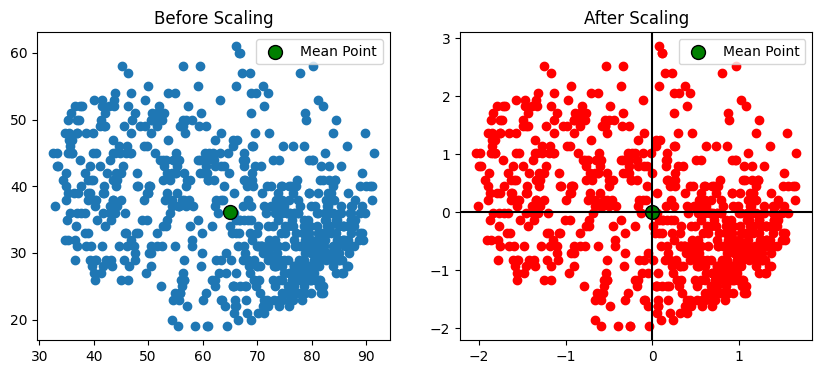

In [81]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
ax1.scatter(X_train['Daily Time Spent on Site'], X_train['Age'])
ax1.scatter(X_train['Daily Time Spent on Site'].mean(), X_train['Age'].mean(), color='green', edgecolor='black', s=100, label='Mean Point')
ax2.scatter(X_train_scaled['Daily Time Spent on Site'], X_train_scaled['Age'], color='red')
ax2.scatter(X_train_scaled['Daily Time Spent on Site'].mean(),X_train_scaled['Age'].mean(),color='green',edgecolor='black',s=100,label='Mean Point')
ax1.set_title('Before Scaling')
ax2.set_title('After Scaling')
ax2.axvline(0, -2, 3,color='black')
ax2.axhline(0, 1, 0,color='black')
ax1.legend()
ax2.legend()
plt.show()


In the figure above, we can see that the mean is centered to zero after scaling and less deviated from mean with no change in the realtive postion of the points.